# Project: Exploring investment options in movie industry

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Movie industry has witnessed a huge improvement in the last 50 years, that's due to technology innovations, social media and other factors which pops up a question, is it good to invest in movie-industry?

Here, I'm trying to make deep exploarations of movie indsutry trying to answer the above question by diving into the movie dataset and asking 7 questions related to (movie genres, top directors and best time to release movies)

The dataset I'm using is collected from (The movie database - TMDB), it contains information about 10,000 movies including main features but not limited to: 
- id and imdb_id
- title, genre
- revenue, revenue
- director, cast, production company
- popularity, vote rate, vote count

Exploring my best options for investments requires answering the following 7 questions: 

    1- What is the performance of movie industry over the last 50 years in terms of the following:
        * number of movies released
        * total budget
        * total revenue
        
    2- Which seasons are best to produce movies for more customers?
    3- Is there a correlation between average vote and average vote count for movies?
    4- Is there a correlation between average vote and runtime for movies?
    5- What are top movie genres in terms of the following:
        * number of movies released
        * total budget allocated
        * total revenues
    
    6- Who are best directors in terms of a KPI combining (movie average vote and revenue)?
    7- What are the list of top production companines in terms of revenue, budget?

Through my analysis, I w'll try to answer the above questions to gain deep knowledge about such industry.

In [186]:
# the followings are the packages i'm using in my analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

By loading the dataset, and investigating its basic properities, it's obvious that it has the following:
* 10866 entries  in 21 columns
* some rows have null values
* release-year columns is not in date format

as follows:

In [187]:
df_original = pd.read_csv('tmdb_movies_rawdata.csv')
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [188]:
df_original.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


The above dataset is not fit for good analysis, so I will do some data cleaning and  improvement so that I can extract better information for my analysis

### Data Cleaning

#### Dropping unwanted columns 
* I will drop 8 columns that i'm no going to use in my analysis so that the dataset becomes narrower

* columns are: id, imdb_id, budget, revenue, overview, tagline, homepage, keywords

In [189]:
#drop unwatend columns
droplist = ['id', 'imdb_id', 'budget', 'revenue', 'overview', 'tagline', 'homepage','keywords']
df=df_original.drop(droplist, axis=1)

#### Handling date columns
since release_date is not in proper formant, I will do the following:
* convert the release_date column into date time format
* extract release_month and release_season into new columns

In [190]:
#converting release date ot datetime format and adding a month column, quarter column
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month_name'] = df['release_date'].dt.month_name()

quarters_numbers = [1,3,6,9,12,13]
quarters_names = ['winter','spring','summer','autumn','winter']
df['release_month_num'] = df['release_date'].dt.month
df['release_quarter'] = pd.cut(df['release_month_num'], bins=quarters_numbers, labels=quarters_names,ordered=False,right=False )

#### Adding profit-loss column
the most important key before choosing to invest in a project on not is expected profit, so it's important to add a profit column

In [191]:
df['profit'] = df['revenue_adj']-df['budget_adj']
df['profit%'] = df['profit']/df['revenue_adj']*100

#### Handling duplicated rows

In [192]:
df.duplicated().sum()

1

Hmmm, it looks there is a one duplicated row, I will drop it and here is it:

In [193]:
#getting the list of duplicated rows
df[df.duplicated()]

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month_name,release_month_num,release_quarter,profit,profit%
2090,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0,March,3,spring,-29033000.0,-3002.37849


In [194]:
# dropping the duplicated row
df.drop_duplicates(inplace=True)

In [195]:
# show the dataset
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month_name,release_month_num,release_quarter,profit,profit%
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,6,summer,1.254446e+09,90.089386


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   original_title        10865 non-null  object        
 2   cast                  10789 non-null  object        
 3   director              10821 non-null  object        
 4   runtime               10865 non-null  int64         
 5   genres                10842 non-null  object        
 6   production_companies  9835 non-null   object        
 7   release_date          10865 non-null  datetime64[ns]
 8   vote_count            10865 non-null  int64         
 9   vote_average          10865 non-null  float64       
 10  release_year          10865 non-null  int64         
 11  budget_adj            10865 non-null  float64       
 12  revenue_adj           10865 non-null  float64       
 13  release_month_na

That is some general info about the dataset so far

#### Handling with null values, if any.
Exploring if my dataset has a null values!

In [197]:
# getting null values, sorted by order
df.isnull().sum().sort_values(ascending=False)

profit%                 4701
production_companies    1030
cast                      76
director                  44
genres                    23
budget_adj                 0
profit                     0
release_quarter            0
release_month_num          0
release_month_name         0
revenue_adj                0
popularity                 0
release_year               0
original_title             0
vote_count                 0
release_date               0
runtime                    0
vote_average               0
dtype: int64

Hmmm, I have lots of null values, I need to have a deeper look into those columns before deciding how to deal with those null values

Since the total number of null values of cast, directors and genres combined equals(76+44+23)= 1.3% of total count of the dataset, then 
it's okay to delete those null values as they won't affect severly on the sample:

In [198]:
# dropping non-important null values
df = df.dropna(subset=['cast','director','genres'])
df.isnull().sum().sort_values(ascending=False)

profit%                 4584
production_companies     959
release_year               0
profit                     0
release_quarter            0
release_month_num          0
release_month_name         0
revenue_adj                0
budget_adj                 0
popularity                 0
original_title             0
vote_count                 0
release_date               0
genres                     0
runtime                    0
director                   0
cast                       0
vote_average               0
dtype: int64

#### Handling with null values in profit% column
By showing 5 rows where profit% column has a null value. it's obvious that null happens where there is no information about revenue, budget related to movies

In [199]:
df[df['profit%'].isnull()][['original_title','revenue_adj','budget_adj']].head(5)

,original_title,revenue_adj,budget_adj
74,Mythica: The Darkspore,0.0,0.0
75,Me and Earl and the Dying Girl,0.0,0.0
92,Mythica: The Necromancer,0.0,0.0
100,Frozen Fever,0.0,0.0
101,High-Rise,0.0,0.0


for null values in profit% colum, I think it is okay to replace null values with zero.

In [200]:
#filling profit% nan with zero values 
df['profit%'] = df['profit%'].fillna(0)

#### Handling with null values in production companies column


before committing a change, I need to know the weight of data where null-values exist in production companies column against the whole dataset

In [201]:
#showing summary statistics of whole dataset
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month_num,profit,profit%
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07,6.832448,3.424093e+07,-inf
std,1.004804,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08,3.434309,1.259412e+08,NaN
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000,-4.139124e+08,-inf
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000,0.000000e+00,0.000000e+00
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,0.000000e+00
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07,10.000000,1.383952e+07,5.988608e+01
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000,2.750137e+09,1.000000e+02


The above table shows summary statistics describing the whole dataset

In [202]:
# showing summary statistics of only data where null values exists in production companies column
df[df['production_companies'].isnull()].describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month_num,profit,profit%
count,959.000000,959.000000,959.000000,959.000000,959.000000,9.590000e+02,9.590000e+02,959.000000,9.590000e+02,959.0
mean,0.223562,97.803962,21.122002,5.976747,2005.143900,9.451630e+05,5.797874e+05,6.395203,-3.653756e+05,-inf
std,0.373217,49.644994,17.918650,1.089891,9.529327,4.445601e+06,4.546927e+06,3.639441,5.539130e+06,NaN
min,0.001117,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00,1.000000,-8.393668e+07,-inf
25%,0.088720,85.000000,12.000000,5.300000,2002.000000,0.000000e+00,0.000000e+00,3.000000,0.000000e+00,0.0
50%,0.173474,93.000000,15.000000,6.000000,2008.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,0.0
75%,0.287342,105.000000,23.000000,6.800000,2012.000000,0.000000e+00,0.000000e+00,10.000000,0.000000e+00,0.0
max,8.411577,900.000000,222.000000,9.200000,2015.000000,8.393668e+07,7.697178e+07,12.000000,6.775543e+07,100.0


The above table shows summary statistics describing the dataset containing only null values in production company columns

In [203]:
# showing the weight of above both sets
df[df['production_companies'].isnull()].describe()/df.describe()*100

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month_num,profit,profit%
count,8.936725,8.936725,8.936725,8.936725,8.936725,8.936725,8.936725,8.936725,8.936725,8.936725
mean,34.256340,95.447527,9.609079,100.201802,100.194092,5.320275,1.114842,93.600468,-1.067073,NaN
std,37.143247,162.803179,3.095746,117.156895,74.330854,12.898399,3.126644,105.973023,4.398188,NaN
min,594.148936,NaN,100.000000,140.000000,100.051020,NaN,NaN,100.000000,20.278849,NaN
25%,42.093939,94.444444,70.588235,98.148148,100.350877,NaN,NaN,75.000000,NaN,NaN
50%,44.815943,93.939394,38.461538,100.000000,100.099701,NaN,NaN,100.000000,NaN,NaN
75%,39.859299,93.750000,15.540541,103.030303,100.049727,0.000000,0.000000,100.000000,0.000000,0.000000
max,25.500629,100.000000,2.272960,100.000000,100.000000,19.749807,2.722618,100.000000,2.463711,100.000000


The above table shows percentage between summary statistics of null-values-in-production-companies and the original dataset

It seems that set where null values exist in production-companies colums is not small, and dropping those values may affect the whole sample. So I will assign a value (unknown) for those null values

In [204]:
# I had an issue filling nan with 'unknown', so i had to convert the column into category type then adding unknown in category
# then replacing nan values with unknown
df['production_companies'] = df['production_companies'].astype("category")
df['production_companies'] = df['production_companies'].cat.add_categories("unknown").fillna("unknown")

In [205]:
df.head(2)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month_name,release_month_num,release_quarter,profit,profit%
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,6,summer,1.254446e+09,90.089386
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May,5,spring,2.101614e+08,60.363216


In [206]:
#showing our final cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10731 non-null  float64       
 1   original_title        10731 non-null  object        
 2   cast                  10731 non-null  object        
 3   director              10731 non-null  object        
 4   runtime               10731 non-null  int64         
 5   genres                10731 non-null  object        
 6   production_companies  10731 non-null  category      
 7   release_date          10731 non-null  datetime64[ns]
 8   vote_count            10731 non-null  int64         
 9   vote_average          10731 non-null  float64       
 10  release_year          10731 non-null  int64         
 11  budget_adj            10731 non-null  float64       
 12  revenue_adj           10731 non-null  float64       
 13  release_month_na

In [207]:
#summary statistics of the dataset
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month_num,profit,profit%
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07,6.832448,3.424093e+07,-inf
std,1.004804,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08,3.434309,1.259412e+08,NaN
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000,-4.139124e+08,-inf
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000,0.000000e+00,0.000000e+00
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,0.000000e+00
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07,10.000000,1.383952e+07,5.988608e+01
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000,2.750137e+09,1.000000e+02


Showing the summary statistics of the cleaned dataset before saving

In [208]:
#saving the cleaned data set to a new file
df.to_csv('cleared_data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


In [209]:
df = pd.read_csv('cleared_data.csv')
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month_name,release_month_num,release_quarter,profit,profit%
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,6,summer,1.254446e+09,90.089386


### Research Question 1: What is the performance of movie-industry in the last 50 years?

#### In terms of number of movies released:

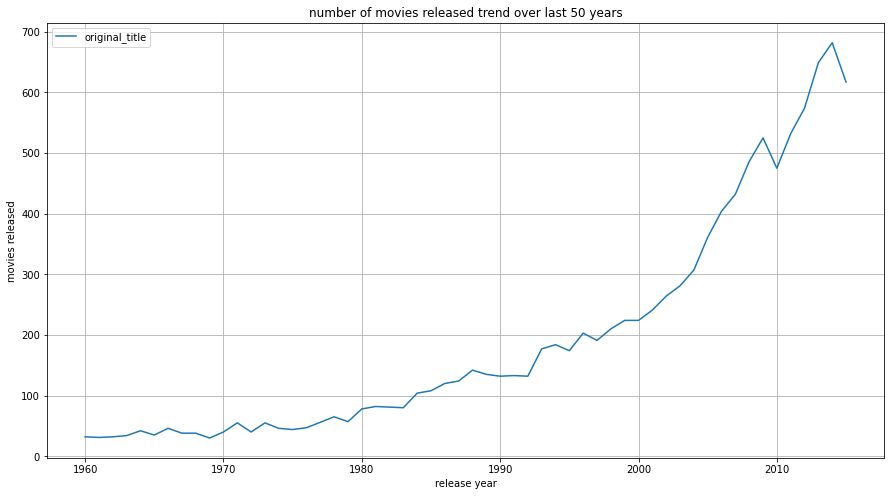

In [210]:
#trend shows the number movies produced in the last years
df.groupby(['release_year'])['original_title'].count().plot(figsize=(15,8));

plt.xlabel('release year')
plt.ylabel('movies released')
plt.grid(True)
plt.title('number of movies released trend over last 50 years');
plt.legend();

* there is a significant increase in the number of movies released in the last 50 years

#### In terms of revenue, budget:

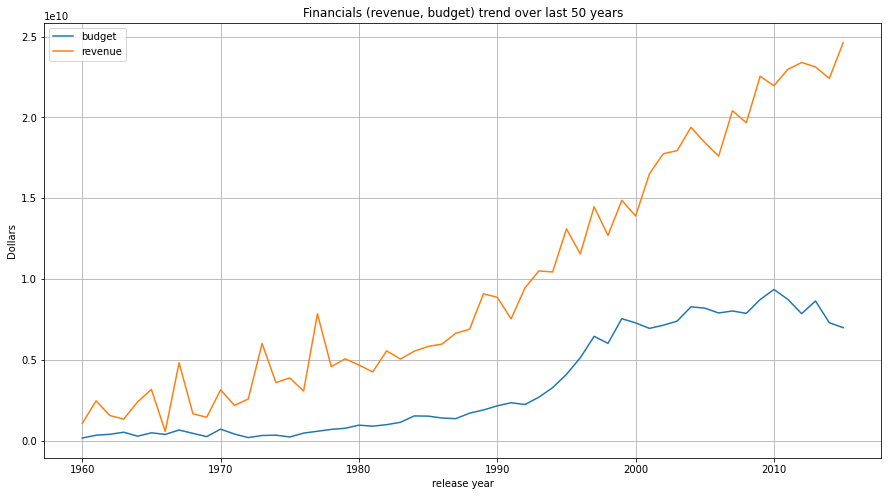

In [211]:
#plot showing the trend of revenues against investments in movie industry
df.groupby(by='release_year')['budget_adj'].sum().plot(figsize=(15,8), label='budget');
df.groupby(by='release_year')['revenue_adj'].sum().plot(figsize=(15,8), label='revenue');
plt.xlabel('release year')
plt.ylabel('Dollars')
plt.grid(True)
plt.title('Financials (revenue, budget) trend over last 50 years');
plt.legend();

Interesting!
* we can notice a slight increase in investments starting in the priod (1960 - now)
* a huge revenue is noticed in the periond (1990 - now)
* the profits is also increased very much in the period (2000 - now)

It's worth to look more deeper in the movie industry as it looks like it is still a promising investment option

### Research Question 2  Which seasons are best to produce movies?

In terms of number of movies release:


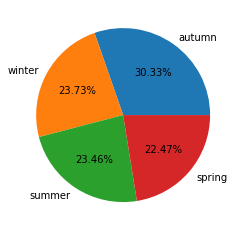

In [212]:
release_quarter_count = df['release_quarter'].value_counts()
plt.pie(release_quarter_count, labels=release_quarter_count.index, autopct='%1.2f%%');

In terms of investments:

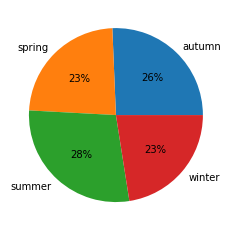

In [213]:
release_quarter_budget = df.groupby('release_quarter')['budget_adj'].sum()
plt.pie(release_quarter_budget, labels=release_quarter_budget.index, autopct='%1.0f%%');

In terms of revenues:

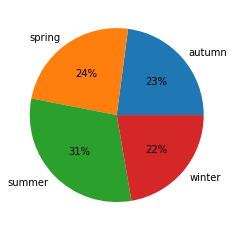

In [214]:
release_quarter_revenue = df.groupby('release_quarter')['revenue_adj'].sum()
plt.pie(release_quarter_revenue, labels=release_quarter_revenue.index, autopct='%1.0f%%');

In terms of average votes:

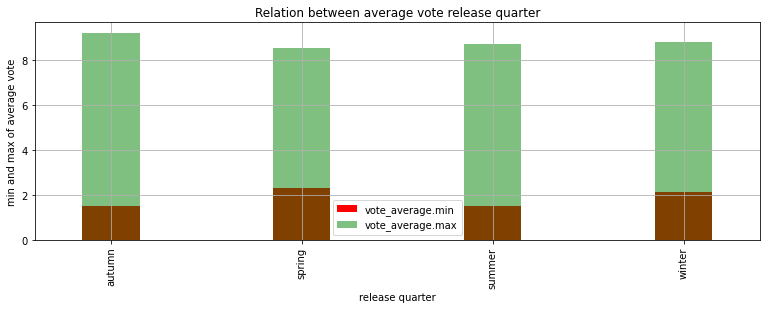

In [215]:
#plotting the max and min average votes of movies - grouped by release-quarter
vmax = df.groupby(by='release_quarter')['vote_average'].max()
vmin = df.groupby(by='release_quarter')['vote_average'].min()
vmin.plot(kind='bar',alpha=1.0, color='r',width=0.3, label='vote_average.min',figsize=(13,4));
vmax.plot(kind='bar',alpha=0.5, color='g',width=0.3, label='vote_average.max',figsize=(13,4));

plt.xlabel('release quarter')
plt.ylabel('min and max of average vote')
plt.grid(True)
plt.title('Relation between average vote release quarter');
plt.legend();

We can conclude the followings: 

* it's obvious that most NUMBER of movies are released in both autumn and summer seasons (almost 54%)

* also most  money invested in movies industry which released in both autumn and summer seasons (almost 54%)

* most profits were generated in movies released in both autumn and summer seasons (almost 54%)

* movies released in summer and autumn seasons had higher average votes

so the high season is summer and autumn season

### Research Question 3  Is there a correlation between average vote & average count for movies?

I will plott a scatter diagram between average vote & vote count for different seasons to inspect if there is any obvios relation between both

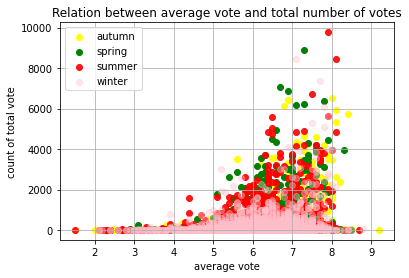

In [216]:
x_autumn=df[df['release_quarter']=='autumn']['vote_average']
y_autumn=df[df['release_quarter']=='autumn']['vote_count']

x_winter=df[df['release_quarter']=='winter']['vote_average']
y_winter=df[df['release_quarter']=='winter']['vote_count']

x_spring=df[df['release_quarter']=='spring']['vote_average']
y_spring=df[df['release_quarter']=='spring']['vote_count']

x_summer=df[df['release_quarter']=='summer']['vote_average']
y_summer=df[df['release_quarter']=='summer']['vote_count']

plt.scatter(x_autumn,y_autumn, c='yellow', label='autumn')
plt.scatter(x_spring, y_spring, c='green', label='spring')
plt.scatter(x_summer,y_summer, c='red', alpha=0.9, label='summer')
plt.scatter(x_winter,y_winter, c='pink', alpha=0.4, label='winter')
plt.xlabel('vote_average')
plt.ylabel('vote_count')

plt.xlabel('average vote')
plt.ylabel('count of total vote')
plt.grid(True)
plt.title('Relation between average vote and total number of votes');
plt.legend();


very obvious correlation between movie rating and voters count, the more count the more the rating and also in high seasons: autumn & summer

### Research Question 4  Is there a correlation between average vote & run time for movies?

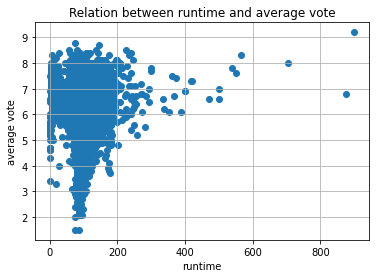

In [217]:
x = df['runtime']
y = df['vote_average']
plt.scatter(x,y);

plt.xlabel('runtime')
plt.ylabel('average vote')
plt.grid(True)
plt.title('Relation between runtime and average vote');

there is not clear correlation between runtime and vote_average

### Research Question 5  What are the top genres for movies in term of (count, revenue, budget)?

Showing a list of movies genres in the set

In [218]:
df['genres'].value_counts().sort_values(ascending=False).head(15)

Drama                   710
Comedy                  707
Drama|Romance           289
Comedy|Drama            280
Documentary             274
Comedy|Romance          267
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         84
Name: genres, dtype: int64

In [219]:
#generate a list of all UNIQUE genres
genres_list = list(df['genres'].value_counts().index)
genres_cleared_list = set('')
for x in genres_list:
    genres_items = x.split('|')
    for y in genres_items:
        genres_cleared_list.add(y)
genres_cleared_list

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

Now, I will create a table showing different genres against there revenue / budget and average vote

In [220]:
#generating a dictionary containig movie genre, count of movies produced, sum of budget and sum of revenues
genresdictionary = {}
for i in genres_cleared_list:
    genre_count = df[df['genres'].str.contains(i)]['original_title'].count()
    genre_budget = df[df['genres'].str.contains(i)]['budget_adj'].sum()
    genre_revenue = df[df['genres'].str.contains(i)]['revenue_adj'].sum()
    genre_average_vote = df[df['genres'].str.contains(i)]['vote_average'].mean()
    genresdictionary[i] = [genre_count,genre_budget,genre_revenue, genre_average_vote]

In [221]:
#generating a dataframe of genres data and adding a profit column
gdf = pd.DataFrame.from_dict(genresdictionary, orient='index', columns =['count', 'budget','revenue', 'vote_average'])
gdf['profits%'] = (gdf['revenue']-gdf['budget'])/gdf['budget']*100
gdf

,count,budget,revenue,vote_average,profits%
Family,1214,3.313284e+10,1.080039e+11,5.986903,225.972360
History,330,8.863019e+09,1.601483e+10,6.411818,80.692692
Animation,664,1.767881e+10,5.959403e+10,6.384789,237.093041
TV Movie,162,4.943559e+07,5.838910e+07,5.741975,18.111463
Drama,4746,7.068704e+10,1.923733e+11,6.163611,172.147958
Western,164,4.042078e+09,7.606709e+09,6.083537,88.188094
Fantasy,908,3.428057e+10,1.018905e+11,5.856057,197.225149
Crime,1353,2.915638e+10,7.668570e+10,6.124982,163.015192
Foreign,184,4.397436e+08,3.243051e+08,5.978804,-26.251325
Horror,1636,1.271104e+10,3.942340e+10,5.337714,210.150722


Sorting top movie-genres in terms of counts:

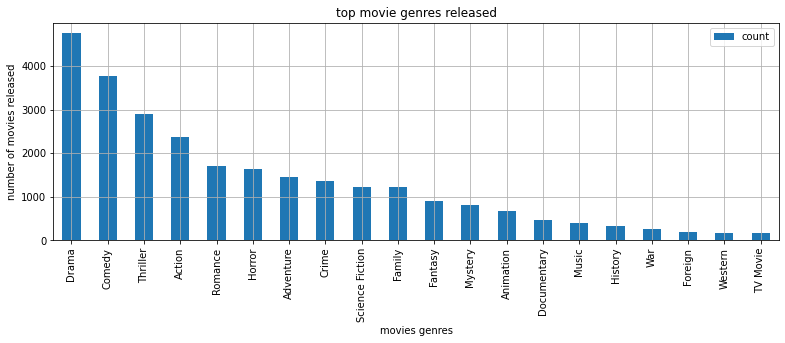

In [222]:
gdf['count'].sort_values(ascending=False).plot(kind='bar', figsize=(13,4));

plt.xlabel('movies genres')
plt.ylabel('number of movies released')
plt.grid(True)
plt.title('top movie genres released');
plt.legend();

it looks that top movies in ternms of count: drama, comedy, thriller, action and romance

Sorting top movie-genres in terms of revenue & budget:

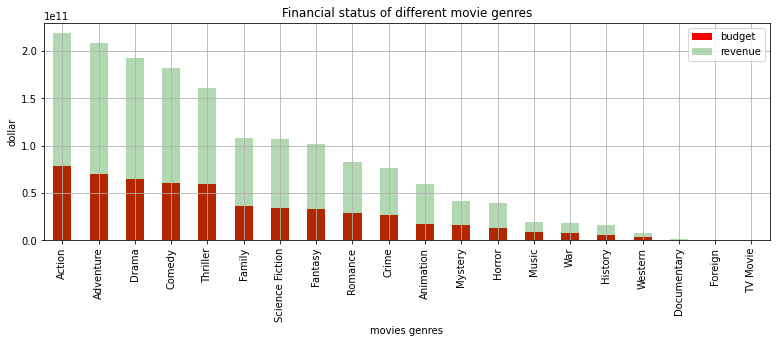

In [223]:
gdf['budget'].sort_values(ascending=False).plot(kind='bar', alpha=1, color='r',label='budget', figsize=(13,4));
gdf['revenue'].sort_values(ascending=False).plot(kind='bar',alpha=0.3, color='g', label='revenue',figsize=(13,4))

plt.xlabel('movies genres')
plt.ylabel('dollar')
plt.grid(True)
plt.title('Financial status of different movie genres');
plt.legend();

top movies in terms of money (invest more money to generate higher revenue) are: action, adventure, drama, comedy and thriller

Exploring the number of movies released trend of top movie-genres  over the last 50 years

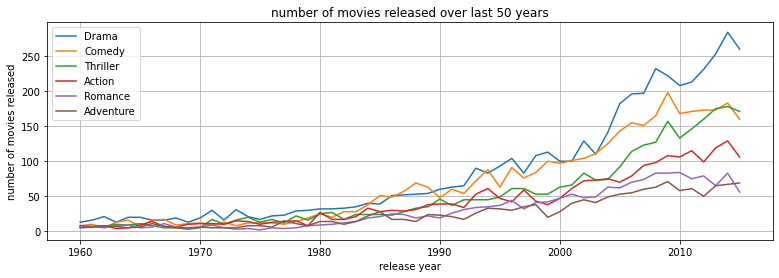

In [224]:
df[df['genres'].str.contains('Drama')].groupby(by='release_year')['original_title'].count().plot(kind='line',label='Drama', figsize=(13,4));
df[df['genres'].str.contains('Comedy')].groupby(by='release_year')['original_title'].count().plot(kind='line',label='Comedy', figsize=(13,4));
df[df['genres'].str.contains('Thriller')].groupby(by='release_year')['original_title'].count().plot(kind='line',label='Thriller', figsize=(13,4));
df[df['genres'].str.contains('Action')].groupby(by='release_year')['original_title'].count().plot(kind='line',label='Action', figsize=(13,4));
df[df['genres'].str.contains('Romance')].groupby(by='release_year')['original_title'].count().plot(kind='line',label='Romance', figsize=(13,4));
df[df['genres'].str.contains('Adventure')].groupby(by='release_year')['original_title'].count().plot(kind='line',label='Adventure', figsize=(13,4));

plt.xlabel('release year')
plt.ylabel('number of movies released')
plt.grid(True)
plt.title('number of movies released over last 50 years');
plt.legend();

the number of drama, comedy and thriller movies have increased since 1980 till 2015

Exploring the revenue trend of top movie-genres over the last 50 years

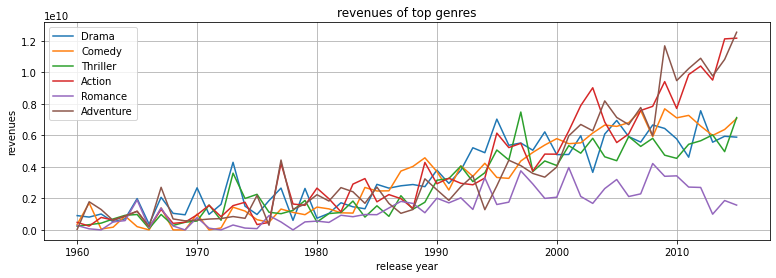

In [225]:
df[df['genres'].str.contains('Drama')].groupby(by='release_year')['revenue_adj'].sum().plot(kind='line',label='Drama', figsize=(13,4));
df[df['genres'].str.contains('Comedy')].groupby(by='release_year')['revenue_adj'].sum().plot(kind='line',label='Comedy', figsize=(13,4));
df[df['genres'].str.contains('Thriller')].groupby(by='release_year')['revenue_adj'].sum().plot(kind='line',label='Thriller', figsize=(13,4));
df[df['genres'].str.contains('Action')].groupby(by='release_year')['revenue_adj'].sum().plot(kind='line',label='Action', figsize=(13,4));
df[df['genres'].str.contains('Romance')].groupby(by='release_year')['revenue_adj'].sum().plot(kind='line',label='Romance', figsize=(13,4));
df[df['genres'].str.contains('Adventure')].groupby(by='release_year')['revenue_adj'].sum().plot(kind='line',label='Adventure', figsize=(13,4));

plt.xlabel('release year')
plt.ylabel('revenues')
plt.grid(True)
plt.title('revenues of top genres');
plt.legend();

Interesting!

Adventure & action got the highest revenues

Sorting top movie-genres in terms of profits%

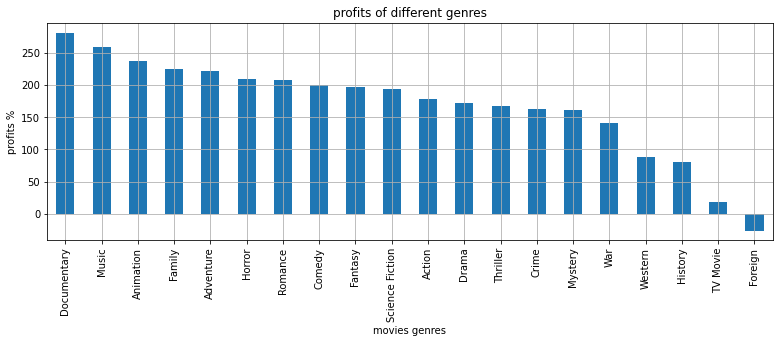

In [226]:
gdf['profits%'].sort_values(ascending=False).plot(kind='bar', alpha=1,label='profits%', figsize=(13,4));
plt.xlabel('movies genres')
plt.ylabel('profits %')
plt.grid(True)
plt.title('profits of different genres');

the ROI for romance, comedy, action and adventure movies are not far away from each others

### Research Question 6 What is the director list whom we can start business with?

Sorting top directors list in terms of movies produced:

In [227]:
df['director'].value_counts().sort_values(ascending=False).head(15)

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      28
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
Barry Levinson       19
Rob Reiner           18
David Cronenberg     18
Mike Nichols         18
John Carpenter       18
Name: director, dtype: int64

In [228]:
# Creating 3 lists of directors 
# director_list: top 50 directors with top movies produced
# director_revenue: top 300 directors with higher revenues
# director_rate: top 100 directors with higher mean average vote
directors_list  = list (df['director'].value_counts().sort_values(ascending=False).head(50).index)
director_revenue = list (df.groupby(by='director')['revenue_adj'].sum().sort_values(ascending=False).head(300).index)
director_rate = list (df.groupby(by='director')['vote_average'].mean().sort_values(ascending=False).head(100).index)

In [229]:
#this function returns a list with intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

#this funciton returns a list with values not in another list
def outsideintersection(biglist, smalllist):
    lst = [value for value in biglist if value not in smalllist]
    return lst

In order to choose the list of best directors to deal with, I'm going to create a KPI column which equals: (yearly mean_count_votes for director)/(yearly mean_votes_count)
and then showing the trend of mean_vote_count over the last years for top directors

In [230]:
# adding the KPI function
vote_count_year = df.groupby(['release_year'])['vote_count'].mean()
df['vote_count_year_mean'] = 0
for i in range (10730):
    year_number  = df.loc[0]['release_year']
    year_location = year_number - 1960
    vote_count_year_mean = vote_count_year.iloc[year_location]
    df.iloc[i, df.columns.get_loc('vote_count_year_mean')] = df.loc[i]['vote_count']/vote_count_year_mean * 100

director_kpi = list (df.groupby(['director'])['vote_count_year_mean'].sum().sort_values(ascending = False).head(15).index)

Showing list of directors having top kpi and among top directors with hights number of released movies

In [231]:
x = intersection(director_kpi, directors_list)
x

['Steven Spielberg',
 'Peter Jackson',
 'Ridley Scott',
 'Robert Zemeckis',
 'Martin Scorsese',
 'Tim Burton',
 'Chris Columbus']

Showing list of directors having top kpi and movies with highes revenues

In [232]:
y= intersection(director_kpi, director_revenue)
y

['Christopher Nolan',
 'Steven Spielberg',
 'Peter Jackson',
 'Quentin Tarantino',
 'Ridley Scott',
 'David Fincher',
 'James Cameron',
 'Robert Zemeckis',
 'Martin Scorsese',
 'Michael Bay',
 'Tim Burton',
 'Chris Columbus',
 'J.J. Abrams',
 'Francis Lawrence',
 'Bryan Singer']

Showing list of nominated directors to examin their trend over the last year

In [233]:
nominated_directors = outsideintersection(y,x)
nominated_directors

['Christopher Nolan',
 'Quentin Tarantino',
 'David Fincher',
 'James Cameron',
 'Michael Bay',
 'J.J. Abrams',
 'Francis Lawrence',
 'Bryan Singer']

Plotting the trend of nominated directors over the last years

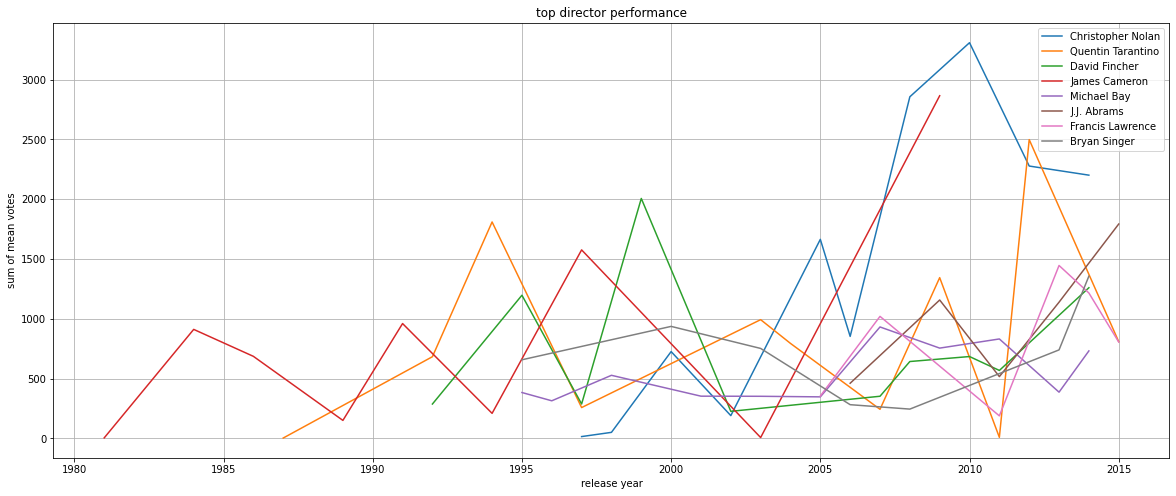

In [234]:
for name in nominated_directors:
    df[df['director']==name].groupby(['release_year'])['vote_count_year_mean'].sum().plot(figsize=(20,8), label=name)
    
plt.xlabel('release year')
plt.ylabel('sum of mean votes')
plt.grid(True)
plt.title('top director performance')
plt.legend();

I guess (Michael Bay, Francis Lawrence) are good options

### Research Question 7  What are the top production companines competitors?

Before entering such market, we have to list the top competitors and to examin their performance over the yeas, here is the list:

In [235]:
top_production_companies_list = list(df['production_companies'].value_counts().sort_values(ascending=False).head(15).index)
top_production_companies_list.remove('unknown')
top_production_companies_list

['Paramount Pictures',
 'Universal Pictures',
 'Warner Bros.',
 'Walt Disney Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'Columbia Pictures',
 'New Line Cinema',
 'Touchstone Pictures',
 '20th Century Fox',
 'Twentieth Century Fox Film Corporation',
 'TriStar Pictures',
 'Orion Pictures',
 'Miramax Films',
 'Columbia Pictures Corporation']

Showing top companines in terms of revenue & budget allocated for movies

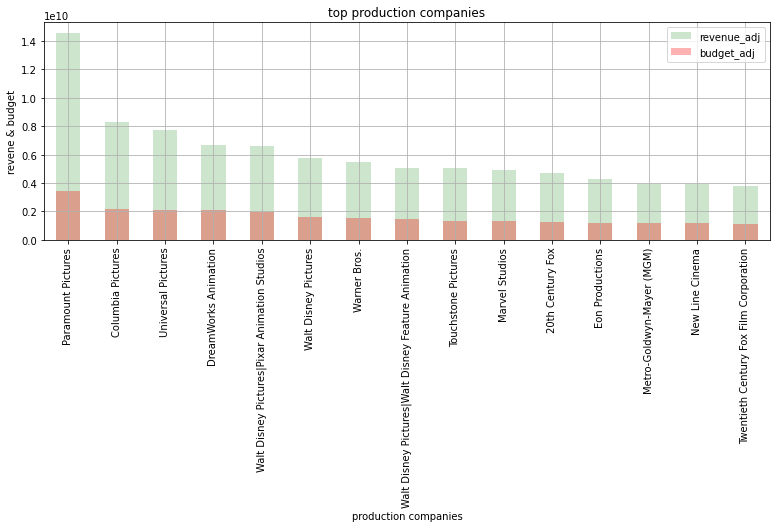

In [236]:
df.groupby(by='production_companies')['revenue_adj'].sum().sort_values(ascending=False).head(15).plot(kind='bar',alpha=0.2, color='g', figsize=(13,4));
df.groupby(by='production_companies')['budget_adj'].sum().sort_values(ascending=False).head(15).plot(kind='bar',alpha=0.3, color='r',figsize=(13,4));
plt.xlabel('production companies')
plt.ylabel('revene & budget')
plt.grid(True)
plt.title('top production companies')
plt.legend();

Here it's shown that top 5 companies in terms of gained revenue and allocated budget for movies are, those are the big competitors :

    1- Paramount pictures
    2- Columbia pictures
    3- Universal pictures
    4- Dreamworks animation
    5- Walt Disney pictures
the following companies have nearly the same total revenue and (revenue to budget) ratio

<a id='conclusions'></a>
## Conclusions

Using the tools of Numpy, Pandas, Python and basic concepts of Data Analysis and EDA. we have succeeded to answer some questions to help us know more about movie industry so that we can make better decision before investing and here are the best options of any new investor who wants to create something remarkable:

* Release movies in high seasons (summer, autumn), since there will be high competition but also you will have lot of reviewers to watch and review your movies

* invest in Drama, comedy and romance movies, they don't require to have big budget for investment. if you are willing to risk, invest in action and adventure movies for HIGHER profits (ROI). Also a mix of drama, comedy with light action would be a good choice

* Try to arrange a meeting with Mr. Michael Bay or Mr. Francis Lawrence for your next movie. as they have a good KPIs over the laat years and good experience to make a good movie.

### Limitations

The above analysis is based on the above dataset which has the following characterstics:

    1- It has data up to only year 2015 and not beyond
    2- There is 1173 null values, most of them are not known production companies
    3- There is 4584 rows where there is no information about neither revenue nor budget